# Analysis of Borrowers' Default Risk

This project is to prepare a report for the loan division of a bank. We will need to determine whether a client's marital status and the number of children have an impact on whether they will default on a loan. The bank already has some data on clients' creditworthiness.

The report will be taken into account when creating a **credit score** for a potential client. The **credit score** is used to assess the ability of a potential borrower to repay their loan.

## Opening the data file and reviewing the general information

In [168]:
import pandas as pd
credit_scoring = pd.read_csv('/datasets/credit_scoring_eng.csv')

## Task 1. Data Exploration

**Data Description**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - client's marital status
- `family_status_id` - marital status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - was there any debt in repaying the loan
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. We will start by analyzing some information from the table, printing out some rows of the table.]

In [169]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [170]:
# printing the first 15 lines
credit_scoring.head(15)



    children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42    bachelor's degree             0   
1          1   -4024.803754         36  secondary education             1   
2          0   -5623.422610         33  Secondary Education             1   
3          3   -4124.747207         32  secondary education             1   
4          0  340266.072047         53  secondary education             1   
5          0    -926.185831         27    bachelor's degree             0   
6          0   -2879.202052         43    bachelor's degree             0   
7          0    -152.779569         50  SECONDARY EDUCATION             1   
8          2   -6929.865299         35    BACHELOR'S DEGREE             0   
9          0   -2188.756445         41  secondary education             1   
10         2   -4171.483647         36    bachelor's degree             0   
11         0    -792.701887         40  secondary education             1   

There are missing values in two columns (total_income and days_employed). The education column also has some details to take into account, such as standardizing its writing.
We can also observe that there are negative values in days_employed. Another factor is the strange occurrence of very high values for these days, not corresponding to the expected reality of life/work expectancy.

In [171]:
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


Analyzing column by column, we can see that in the first column, the minimum value is the one that raises a lot of curiosity. Initially, I thought it could be due to a death, hence this -1 being included in the count, but after some reflection, I set aside that hypothesis because the more sensible value in that context would be 0, not -1. In the second and last column, as mentioned earlier, there are values that deserve further consideration and work on data modification. The remaining columns seem to have 'normal' values and, for now, do not require significant attention in their study.

In [172]:
credit_scoring[credit_scoring['days_employed'].isna()].head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


In [173]:
credit_scoring['days_employed'].value_counts(normalize='True')

-327.685916     0.000052
-1580.622577    0.000052
-4122.460569    0.000052
-2828.237691    0.000052
-2636.090517    0.000052
                  ...   
-7120.517564    0.000052
-2146.884040    0.000052
-881.454684     0.000052
-794.666350     0.000052
-3382.113891    0.000052
Name: days_employed, Length: 19351, dtype: float64

Through this simple analysis, we can observe that the values in the columns days_employed and total_income are symmetrical due to the simple fact that both values are missing simultaneously.

In [174]:
subset = credit_scoring[credit_scoring['days_employed'].isna() & (credit_scoring['total_income'].isna())].shape # Vamos aplicar várias condições para filtrar dados e observar o número de linhas na tabela filtrada.
subset

(2174, 12)


**Intermediate Conclusion**

We can state that there are 2174 missing values in the columns days_employed and total_income.

There are many missing values, so we will fill them in, but first, we will have to take into account some factors such as the type of employment, gender, etc.
Later on, we will also address some values mentioned above that can influence many of our data.

In [175]:
#creating one table with null values

credit_scoring_null = credit_scoring[(credit_scoring['days_employed'].isna()) & (credit_scoring['total_income'].isna())]

credit_scoring_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


In [176]:
credit_scoring_null.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
65,0,NaN,21,secondary education,1,unmarried,4,M,business,0,NaN,transactions with commercial real estate
67,0,NaN,52,bachelor's degree,0,married,0,F,retiree,0,NaN,purchase of the house for my family
72,1,NaN,32,bachelor's degree,0,married,0,M,civil servant,0,NaN,transactions with commercial real estate
82,2,NaN,50,bachelor's degree,0,married,0,F,employee,0,NaN,housing
83,0,NaN,52,secondary education,1,married,0,M,employee,0,NaN,housing


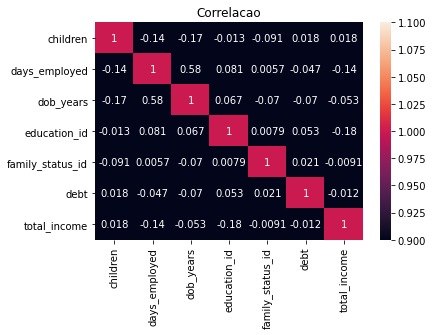

In [177]:
import seaborn as sns
heatmap = sns.heatmap(credit_scoring.corr(), vmin = 1, vmax = 1, annot=True)
heatmap.set_title('Correlacao');

**Possible reasons for missing values in the data**

One of the reasons for the existence of missing values in the data may be duplicate records in some columns. Without considering the days_employed and total_income columns, we can try to check if columns like purpose, which seems to be a column filled in the way people wanted, without a specific name for each purpose, do not affect these missing values.


**Let's start by checking if the missing values are random, and also verify the distribution.**

In [178]:
#Checking other reasons and patterns that may lead to missing values
credit_scoring_null['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [179]:
credit_scoring['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
entrepreneur                   0.000093
unemployed                     0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

In [180]:
credit_scoring_null['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

In [181]:
credit_scoring['gender'].value_counts(normalize=True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

In [182]:
credit_scoring_null['children'].value_counts(normalize=True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

In [183]:
credit_scoring['children'].value_counts(normalize=True)

 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

In [184]:
credit_scoring_null.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,2174.000000,0.0,2174.000000,2174.000000,2174.000000,2174.000000,0.0
mean,0.552438,NaN,43.632015,0.800828,0.975161,0.078197,NaN
std,1.469356,NaN,12.531481,0.530157,1.418220,0.268543,NaN
min,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,34.000000,0.250000,0.000000,0.000000,NaN
50%,0.000000,NaN,43.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,NaN,54.000000,1.000000,1.000000,0.000000,NaN
max,20.000000,NaN,73.000000,3.000000,4.000000,1.000000,NaN


In [185]:
len(credit_scoring_null)/len(credit_scoring)

0.10099883855981417

## Data Transformation
Let's examine each column to see what issues we may have in them, removing duplicates, and correcting errors.

In [186]:
# Let's see all the values in the education column to correct their spelling
credit_scoring['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [187]:
credit_scoring['education'] = credit_scoring['education'].str.lower()


In [188]:
# Checking all values in the column to make sure we have corrected them.
credit_scoring['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [189]:
#Checking values in the column children
credit_scoring['children'].value_counts()


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

As mentioned earlier, there are problematic data in this column. I will replace the most extreme values. I will replace the values -1 and 20. One of the reasons might have been an accidental input of these values. Who has never typed something by accident? I will then replace -1 with 1 and 20 with 2.

In [190]:
#Substituting values
credit_scoring['children'] = credit_scoring['children'].replace(-1, 1)
credit_scoring['children'] = credit_scoring['children'].replace(20, 2)


In [191]:
# Check if our changes were done correctly
credit_scoring['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Now let's analyze the column 'days_employed'. We will replace the negative values and those that have a very high number of days. For this, we will calculate the mean and median, set a value of 27365 days (basically the number of days for 75 years), so that we can then replace these values.

In [192]:
# Let's find problematic data in days_employed, if any, and calculate the percentage.

credit_scoring['days_employed'].value_counts(normalize=True) * 100


-327.685916     0.005168
-1580.622577    0.005168
-4122.460569    0.005168
-2828.237691    0.005168
-2636.090517    0.005168
                  ...   
-7120.517564    0.005168
-2146.884040    0.005168
-881.454684     0.005168
-794.666350     0.005168
-3382.113891    0.005168
Name: days_employed, Length: 19351, dtype: float64

In [193]:
credit_scoring['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

If the amount of problematic data is high, it may be due to some technical issues. We might want to propose the most obvious reason why this could have happened and what could have been the correct data, as we cannot dismiss these problematic rows.

In [194]:
mean_income_days = credit_scoring.groupby('income_type')['days_employed'].mean()/365

In [195]:
median_income_days = credit_scoring.groupby('income_type')['days_employed'].median()/365

In [196]:
credit_scoring['days_employed'] = abs(credit_scoring['days_employed'])

In [197]:
median_income_days = credit_scoring.groupby('income_type')['days_employed'].median()/365

In [198]:
cs_days = credit_scoring[credit_scoring['days_employed'] < 27365]
days_median = cs_days['days_employed'].median()
days_median

1630.0193809778218

In [199]:
cs_days_big = credit_scoring[credit_scoring['days_employed'] > 27365]
cs_days_big

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21518,0,373995.710838,59,secondary education,1,married,0,F,retiree,0,24618.344,purchase of a car


In [200]:
#Checking if values are correct
credit_scoring.loc[credit_scoring['days_employed'] > 27365, 'days_employed'] = days_median

In [201]:
credit_scoring['days_employed'].value_counts()

1630.019381    3445
142.276217        1
144.185854        1
2569.204627       1
3545.955468       1
               ... 
2152.475526       1
6219.157426       1
5873.586442       1
3355.260838       1
1636.419775       1
Name: days_employed, Length: 15907, dtype: int64

There is age 0 in the column. We will calculate the average age and then replace that value with the average age.

In [202]:
# Checking `dob_years` for suspicious values and calculating their percentage.
credit_scoring['dob_years'].value_counts(normalize=True)*100

35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37    2.494774
50    2.387921
43    2.383275
32    2.369338
49    2.360046
28    2.336818
45    2.308943
27    2.290360
56    2.262485
52    2.248548
47    2.229965
54    2.225319
46    2.206736
58    2.141696
57    2.137050
53    2.132404
51    2.081301
59    2.062718
55    2.058072
26    1.895470
60    1.751452
25    1.658537
61    1.649245
62    1.635308
63    1.249710
64    1.231127
24    1.226481
23    1.180023
65    0.901278
66    0.850174
22    0.850174
67    0.775842
21    0.515679
0     0.469222
68    0.459930
69    0.394890
70    0.301974
71    0.269454
20    0.236934
72    0.153310
19    0.065041
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64

**Now it's time to calculate the median age so we can substitute ht e value 0.**

In [203]:
median_age = credit_scoring['dob_years'].median()
credit_scoring['dob_years'] = credit_scoring['dob_years'].replace(0, median_age)


In [204]:
# Checking the result
credit_scoring['dob_years'].value_counts()


42.0    698
35.0    617
40.0    609
41.0    607
34.0    603
38.0    598
33.0    581
39.0    573
31.0    560
36.0    555
44.0    547
29.0    545
30.0    540
48.0    538
37.0    537
50.0    514
43.0    513
32.0    510
49.0    508
28.0    503
45.0    497
27.0    493
56.0    487
52.0    484
47.0    480
54.0    479
46.0    475
58.0    461
57.0    460
53.0    459
51.0    448
59.0    444
55.0    443
26.0    408
60.0    377
25.0    357
61.0    355
62.0    352
63.0    269
64.0    265
24.0    264
23.0    254
65.0    194
66.0    183
22.0    183
67.0    167
21.0    111
68.0     99
69.0     85
70.0     65
71.0     58
20.0     51
72.0     33
19.0     14
73.0      8
74.0      6
75.0      1
Name: dob_years, dtype: int64

Now let's check the 'family_status' column, and apparently, there are no problematic values, so no changes need to be made.

In [205]:
credit_scoring['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [206]:
credit_scoring['family_status'].describe()

count       21525
unique          5
top       married
freq        12380
Name: family_status, dtype: object

Now let's check the column `gender`.

In [ ]:
credit_scoring['gender'].value_counts()

There's a weird value so let's get rid of it

In [208]:
credit_scoring[credit_scoring['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


In [209]:
credit_scoring.drop(credit_scoring[credit_scoring['gender'] == 'XNA'].index, inplace=True)

credit_scoring[credit_scoring['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [210]:
credit_scoring['gender'].value_counts()

F    14236
M     7288
Name: gender, dtype: int64

Now let's check the income_type column. Another column that doesn't have values to be changed.

In [211]:
# Checking the values of column
credit_scoring['income_type'].value_counts()

employee                       11119
business                        5084
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [212]:
# Checking for duplicates
credit_scoring.duplicated().sum()

72

In [213]:
# Removing duplicates
credit_scoring = credit_scoring.drop_duplicates().reset_index(drop=True)


In [214]:
credit_scoring.duplicated().sum()# Última verificação se temos duplicatas


0

I removed the duplicates because, as they have a very low value, I believe they will not interfere with our study.

In [215]:
#Checking the size of the dataset we have now after the initial manipulations.
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21452 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21452 non-null  float64
 3   education         21452 non-null  object 
 4   education_id      21452 non-null  int64  
 5   family_status     21452 non-null  object 
 6   family_status_id  21452 non-null  int64  
 7   gender            21452 non-null  object 
 8   income_type       21452 non-null  object 
 9   debt              21452 non-null  int64  
 10  total_income      19350 non-null  float64
 11  purpose           21452 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


After our changes, there was a slight decrease in our dataset. There are still values to be replaced; we will address them later.

In [216]:
credit_scoring['total_income'].isnull().sum()

2102

# Working with missing values

Let's start working with dictionaries that will help us in replacing missing values.

In [217]:
educacao_familia = credit_scoring[['education_id', 'education', 'family_status', 'family_status_id']] 
educacao_familia = educacao_familia.drop_duplicates().reset_index(drop=True)

educacao_familia



,education_id,education,family_status,family_status_id
0,0,bachelor's degree,married,0
1,1,secondary education,married,0
2,1,secondary education,civil partnership,1
3,0,bachelor's degree,civil partnership,1
4,2,some college,married,0
5,1,secondary education,widow / widower,2
6,1,secondary education,divorced,3
7,1,secondary education,unmarried,4
8,3,primary education,married,0
9,0,bachelor's degree,unmarried,4


### Restore missing values in `total_income`

The total_income column contains missing values. Let's start by creating a function that calculates the age category. Then, we'll create a new column based on this function, which relates the age category to the age itself. We'll also establish a relationship between income and education to later replace the missing values in total_income (income or salary based on education has an influence on these values). 

We'll begin by creating an age category function for clients; subsequently, we'll create a new column with the age category. This strategy can assist in calculating values for total income.


In [218]:
# Let's write a function that calculates the age category.



def age_group(age):
    if age <= 18:
        return 'early adulthood'
    if age <= 65:
        return 'adult'
    if age <= 75:
        return 'senior'
    

    

In [219]:
# Checking if it works
print(age_group(18))
print(age_group(64))
print(age_group(70))


early adulthood
adult
senior


In [220]:
#Creating column that is based in function
credit_scoring['age_group'] = credit_scoring['dob_years'].apply(age_group)



In [221]:
credit_scoring['age_group'].value_counts()



adult     20750
senior      702
Name: age_group, dtype: int64

Next, we will create a table that has only data without missing values. This data will be used to restore the missing values.

In [222]:
#Creating one table without missing values
credit_scoring_no_nan = credit_scoring[credit_scoring['days_employed'].isnull() != True]
credit_scoring_no_nan.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,adult
1,1,4024.803754,36.0,secondary education,1,married,0,F,employee,0,17932.802,car purchase,adult
2,0,5623.422610,33.0,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,adult
3,3,4124.747207,32.0,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,adult
4,0,1630.019381,53.0,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,adult
5,0,926.185831,27.0,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,adult
6,0,2879.202052,43.0,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,adult
7,0,152.779569,50.0,secondary education,1,married,0,M,employee,0,21731.829,education,adult
8,2,6929.865299,35.0,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,adult
9,0,2188.756445,41.0,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,adult


In [223]:
#Checking mean values of rent
credit_scoring.groupby('education')['total_income'].mean()

education
bachelor's degree      33142.802434
graduate degree        27960.024667
primary education      21144.882211
secondary education    24594.503037
some college           29040.132990
Name: total_income, dtype: float64

In [224]:
#Checking median values of rent
credit_scoring.groupby('education')['total_income'].median()


education
bachelor's degree      28054.5310
graduate degree        25161.5835
primary education      18741.9760
secondary education    21836.5830
some college           25608.7945
Name: total_income, dtype: float64

Since the mean is used for a distribution of normal values where there is a low rate of outliers, and as we have a large numeric distribution, we will choose to use the median.

In [225]:
#Writing a function that we will use to fill in missing values
credit_scoring["total_income"] = (credit_scoring["total_income"].fillna(credit_scoring.groupby("age_group")["total_income"].transform("median")))
        
        

In [226]:
# Checking if it works
credit_scoring['total_income'].isna().sum()


0

In [227]:
# Checking ifthere's any error
credit_scoring.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21452 entries, 0 to 21451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21452 non-null  int64  
 1   days_employed     19350 non-null  float64
 2   dob_years         21452 non-null  float64
 3   education         21452 non-null  object 
 4   education_id      21452 non-null  int64  
 5   family_status     21452 non-null  object 
 6   family_status_id  21452 non-null  int64  
 7   gender            21452 non-null  object 
 8   income_type       21452 non-null  object 
 9   debt              21452 non-null  int64  
 10  total_income      21452 non-null  float64
 11  purpose           21452 non-null  object 
 12  age_group         21452 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


Checking if the total number of values in this column matches the number of values in others, but just after checking if we are done with 'total_income'.

In [228]:
credit_scoring.shape

(21452, 13)

###  Restore values in `days_employed`

Na coluna days_employed iremos faer um estudo semelhante ao que fizemos em total_income.
Iremos calcular as media e mediana para decidir qual utilizar na hora de substituir esses valores.

In [229]:
# Distribution of median `days_employed`.
median_days_employed = credit_scoring.groupby('income_type')['days_employed'].median()


In [230]:
# Distribution of mean `days_employed`
credit_scoring.groupby('income_type')['days_employed'].mean()

income_type
business                       2111.470404
civil servant                  3399.896902
employee                       2326.499216
entrepreneur                    520.848083
paternity / maternity leave    3296.759962
retiree                        1630.019381
student                         578.751554
unemployed                     1630.019381
Name: days_employed, dtype: float64

Since our numeric set has widely dispersed values, we will try to obtain a result with more centralized tendency, so we will choose to use the median.

In [231]:
# Writing a formula to calculate median

def filling_days(row):
    if pd.isna(row['days_employed']):
        return median_days_employed
    else:
        return row['days_employed']
    
   
    
    


In [232]:
credit_scoring.loc[12]

children                              0
days_employed                       NaN
dob_years                          65.0
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income                  23356.715
purpose               to have a wedding
age_group                         adult
Name: 12, dtype: object

In [233]:
filling_days(credit_scoring.loc[1])

4024.803753850451


In [234]:

credit_scoring['income_type'] = credit_scoring.apply(filling_days, axis=1)

In [235]:
# Checking if function is working
credit_scoring['income_type']



0        8437.673028
1        4024.803754
2         5623.42261
3        4124.747207
4        1630.019381
            ...     
21447    4529.316663
21448    1630.019381
21449    2113.346888
21450    3112.481705
21451    1984.507589
Name: income_type, Length: 21452, dtype: object

In [236]:
pivot_ed_genre = credit_scoring.pivot_table(index = ['education', 'gender'], values='total_income', aggfunc='median')
pivot_ed_genre

total_income
education           gender              
bachelor's degree   F         24368.4640
                    M         30795.2430
graduate degree     F         29345.3940
                    M         25161.5835
primary education   F         18212.5840
                    M         21962.6390
secondary education F         21346.3040
                    M         24086.1220
some college        F         23356.7150
                    M         28035.5390

In [237]:
def fill_total_income(row):
    total_income = row['total_income']
    educacao = row['education']
    genero = row['gender']
    
    if pd.isna(total_income):
        return pivot_education_genero['total_income'][educacao][genero]
    


credit_scoring['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

In [238]:
# Verificando as entradas em todas as colunas 
credit_scoring.shape

(21452, 13)

## Data Categorization

[To answer the questions and test the hypotheses, we'll want to work with categorized data. we have to look at the questions we've been asked and need to answer. Think about which data needs to be categorized to answer these questions.

In [239]:
# Displaying the values of selected data for categorization
credit_scoring['purpose'].value_counts()

wedding ceremony                            791
having a wedding                            767
to have a wedding                           765
real estate transactions                    675
buy commercial real estate                  661
housing transactions                        652
buying property for renting out             651
transactions with commercial real estate    650
housing                                     646
purchase of the house                       646
purchase of the house for my family         638
construction of own property                635
property                                    633
transactions with my real estate            627
building a real estate                      624
purchase of my own house                    620
buy real estate                             620
building a property                         619
housing renovation                          607
buy residential real estate                 606
buying my own car                       

Let's check exclusive values

In [240]:
credit_scoring['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [241]:
credit_scoring['total_income'].value_counts()

23356.715    2044
17978.231      58
31791.384       2
42413.096       2
17312.717       2
             ... 
27715.458       1
23834.534       1
26124.613       1
28692.182       1
41428.916       1
Name: total_income, Length: 19349, dtype: int64

In [242]:
credit_scoring['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

Next, we will create functions to categorize the common data in both total_income and purpose.

In [243]:

def categorize_purpose(row):
    if 'car' in row['purpose']:
        return 'carro'
    if 'hou' in row['purpose'] or 'pro' in row['purpose'] or 'real' in row['purpose']:
        return 'real estate'
    if 'wed' in row['purpose']:
        return 'wedding'
    if 'edu' in row['purpose'] or 'uni' in row['purpose']:
        return 'education'
    
print(categorize_purpose(credit_scoring.loc[2]))
print(categorize_purpose(credit_scoring.loc[3]))
print(categorize_purpose(credit_scoring.loc[4]))
print(categorize_purpose(credit_scoring.loc[5]))

   

real estate
education
wedding
real estate


In [244]:
# Creating column with cathegories counting their values
credit_scoring['group_purpose'] = credit_scoring.apply(categorize_purpose, axis =1)
credit_scoring['group_purpose'].value_counts()


real estate    11246
carro           4306
education       3577
wedding         2323
Name: group_purpose, dtype: int64

In [245]:
def economic_class(row):
    if row <= 16000:
        return 'low class'
    elif row <= 24000:
        return 'executive class'
    elif row <= 32000:
        return 'first class'
    else : return 'other'



In [246]:
# Creating column with categories 
credit_scoring['economic_class'] = credit_scoring['total_income'].apply(economic_class)


In [247]:
# Counting the values of each category to check distribution
credit_scoring['economic_class'].value_counts()


executive class    7806
other              5065
low class          4463
first class        4118
Name: economic_class, dtype: int64

## Verifying Hipothesys 


****Is there a correlation between income level and on-time payments?****

In [248]:

pivot_table_pay_children = credit_scoring.pivot_table(index = 'children', columns='debt', aggfunc='count')



credit_scoring[credit_scoring['debt'] == 1].groupby('children')['debt'].count()/credit_scoring.groupby('children')['debt'].count() * 100


children
0    7.544893
1    9.165808
2    9.492481
3    8.181818
4    9.756098
5         NaN
Name: debt, dtype: float64

**Conclusion**

Through analysis, we may notice that the relationship between the default rate and the number of children is low.


**Is there a correlation between family status and on-time payments?**

In [249]:
# Checking data of family status and payment day

pivot_table_pay_family = credit_scoring.pivot_table(index = 'family_status', columns='debt', aggfunc='count')


# Calculating the default rate based on family status.

credit_scoring[credit_scoring['debt'] == 1].groupby('family_status')['debt'].count()/credit_scoring.groupby('family_status')['debt'].count() * 100


family_status
civil partnership    9.351651
divorced             7.112971
married              7.545182
unmarried            9.750890
widow / widower      6.569343
Name: debt, dtype: float64

**Conclusion**

Through this study, we can observe that the default rate is quite high for any marital status, although it's noticeable that widowed individuals find it more challenging to get into debt. In this case, singles or those in a civil partnership are more prone to getting into debt, perhaps because they are starting their lives where there is a higher loan rate.

**Is there a correlation between family status and on-time payments?**

In [250]:

pivot_table_pay_renda = credit_scoring.pivot_table(index = 'total_income', columns='debt', aggfunc='count')





credit_scoring[credit_scoring['debt'] == 1].groupby('economic_class')['debt'].count()/credit_scoring.groupby('economic_class')['debt'].count() * 100


economic_class
executive class    8.467845
first class        8.936377
low class          7.931884
other              7.068115
Name: debt, dtype: float64

**How does the purpose of credit affect the default rate?**

In [251]:
pivot_table_kids = credit_scoring.pivot_table(index='group_purpose', columns='debt', values='dob_years', aggfunc='count')# Confira os percentuais de inadimplência para cada finalidade de crédito e analise-os
pivot_table_kids.reset_index().sort_values(by=1, ascending=True)


debt,group_purpose,0,1
3,wedding,2137,186
1,education,3251,326
0,carro,3903,403
2,real estate,10420,826


**Conclusion**

It is observed that the purpose of credit affects indebtedness.

In a first analysis, after loading the provided libraries, I began by checking the information in our table, printing some rows to examine values that might need alteration. Some of these values recorded individuals with -1 and 20 children, missing values, duplicates, or even negative values in days of work.

After a more detailed analysis of the data, I had to start by addressing these issues.

- The "education" column had values written in both uppercase and lowercase; in this case, we changed all the data in the column to lowercase.

- In the "children" column, there were two values that stood out: -1 and 20 children. After a few minutes of reflection on whether to remove these values or replace them with other values, I decided that there might have been an error in filling out the table. So, I replaced -1 with 1 and 20 with 2, as these seemed to be more accurate values.

- The "dob_years" column also had an unusual value, where the age was 0. I calculated the mean and median to replace these 0 values with the median.

- For a subsequent replacement of some values in the "days_employed" column, I began by calculating the mean and medians and created a function for this replacement.

- The "gender" column had a gender that I ended up removing. Since there were few values, and in my opinion, it wasn't crucial to keep them for later studies.

I ended up removing the 72 existing duplicates; as it was a low number, I felt it would not significantly impact our study.

When restoring the values of "total_income," I created a single-line function, where there was a relationship between a function created to categorize age and "total_income."

The values of "days_employed" were restored in a similar way, where the missing values were replaced by a function with conditions, returning the median of those values.

In general, we can conclude that there is a relationship between the number of children and debt payments. It is easier for those with fewer children, as well as those in the early stages of their "life," such as singles or those living in a civil partnership, to become indebted due to loan requests for buying cars, studying, and even getting married. Lastly, it is important to mention that those in a higher economic situation tend to have more debt, and the purpose of the credit affects indebtedness.


